In [1]:
"""
This code seeks to analyze if place fields formed in different sessions have the same probability curve.
"""

from mylib.statistic_test import *
from mylib.statistic_test import GetMultidayIndexmap, ReadCellReg
from mylib.multiday.core import MultiDayCore

code_id = "0313 - Conditional Probability for Field Maintain"
loc = join(figpath, code_id, 'Novelty')
mkdir(loc)

if os.path.exists(join(figdata, code_id+' [Novelty].pkl')):
    with open(join(figdata, code_id+' [Novelty].pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = DataFrameEstablish(variable_names = [
                             'Duration', 'Init Session', 'Conditional Prob.', 'Conditional Recover Prob.',
                             'Paradigm', 'On-Next Num', 'Off-Next Num'], 
                             f_member=['Type'], 
                             f = f_CellReg_modi, function = ConditionalProb_Interface_NovelFalimiar, 
                             file_name = code_id+' [Novelty]', behavior_paradigm = 'CrossMaze'
           )
    
# Statistical Analysis using one-way ANOVA
# Define a function to perform one-way ANOVA
def one_way_anova(data: dict, init_session_max: int, duration: int, key: str) -> None:
    
    groups = []
    for i in range(1, init_session_max+1):
        idx = np.where(
            (data['Duration'] == duration) &
            (data['Init Session'] == i)
        )[0]
        if len(idx) > 0:
            groups += [data[key][idx]]
    f_value, p_value = scipy.stats.f_oneway(*groups)
    return f"  F-value: {f_value:.4f}, p-value: {p_value}, len: {len(groups)}"

colors = sns.color_palette("rocket", 3)[1:]
markercolors = [sns.color_palette("Blues", 3)[1], sns.color_palette("Blues", 3)[2]]
chancecolors = ['#D4C9A8', '#8E9F85', '#C3AED6', '#FED7D7']

ModuleNotFoundError: No module named 'h5py'

In [1]:
from mylib.statistic_test import *

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

# Maze A (Fig. S11A)

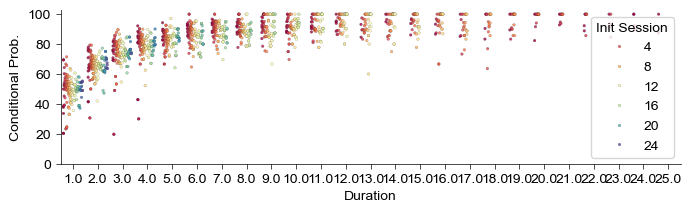

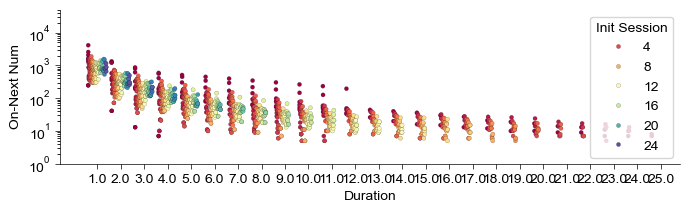

Maze A - Conditional Prob.:
  1 -   F-value: 0.6405, p-value: 0.7887981981730174, len: 12
  2 -   F-value: 0.5227, p-value: 0.8824927730899098, len: 12
  3 -   F-value: 0.7478, p-value: 0.6895939865374289, len: 12
  4 -   F-value: 0.9652, p-value: 0.48555032755561534, len: 12
  5 -   F-value: 1.7740, p-value: 0.07779149237353569, len: 12
  6 -   F-value: 1.7442, p-value: 0.08567093265974632, len: 12
  7 -   F-value: 3.3748, p-value: 0.0012989721189637666, len: 12
  8 -   F-value: 1.4027, p-value: 0.2005449486067953, len: 12
  9 -   F-value: 1.4167, p-value: 0.19716497362454402, len: 12
  10 -   F-value: 3.1007, p-value: 0.0037885571470488116, len: 12
  11 -   F-value: 1.4739, p-value: 0.18554976623812044, len: 12


In [13]:
#Data['hue'] = np.array([Data['Papadigm'][i] + ' ' + Data['Maze Type'][i] for i in range(Data['Duration'].shape[0])])
idx = np.where((Data['Paradigm'] == 'CrossMaze')&
               (np.isnan(Data['Conditional Prob.']) == False)&
               (Data['Maze Type'] != 'Open Field')&
               (Data['Type'] == 'Real'))[0]
SubData = SubDict(Data, Data.keys(), idx=idx)

idx1 = np.where(SubData['Maze Type'] == 'Maze 1')[0]
idx2 = np.where(SubData['Maze Type'] == 'Maze 2')[0]

fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx1),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'Conditional prob [Maze 1].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional prob [Maze 1].svg'), dpi = 600)
plt.show()

fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'On-Next Num',
    data=SubDict(SubData, SubData.keys(), idx=idx1),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.1,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.semilogy()
ax.set_ylim(1, 50000)
plt.savefig(join(loc, 'On-next num [Maze 1].png'), dpi = 600)
plt.savefig(join(loc, 'On-next num [Maze 1].svg'), dpi = 600)
plt.show()
# Statistical Test
print("Maze A - Conditional Prob.:")
for dur in range(1, 12):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx1), duration = dur, init_session_max=12, key = 'Conditional Prob.'))

# Fig. S11B

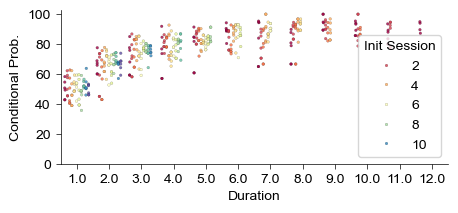

Maze B - Conditional Prob.:
  1 -   F-value: 0.6777, p-value: 0.7401696091478521, len: 11
  2 -   F-value: 1.3580, p-value: 0.22433650500676067, len: 11
  3 -   F-value: 1.1913, p-value: 0.3213059415599884, len: 10
  4 -   F-value: 0.9060, p-value: 0.5200399478376456, len: 9
  5 -   F-value: 1.1830, p-value: 0.33426290961971067, len: 8
  6 -   F-value: 1.8853, p-value: 0.11108882671682602, len: 7
  7 -   F-value: 2.1375, p-value: 0.08809433401518252, len: 6
  8 -   F-value: 3.0703, p-value: 0.03465117125720211, len: 5
  9 -   F-value: 1.5860, p-value: 0.2275610357868199, len: 4
  10 -   F-value: 0.1407, p-value: 0.8700368891832406, len: 3
  11 -   F-value: 0.3190, p-value: 0.584644567109726, len: 2


In [14]:
fig = plt.figure(figsize=(5, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx2),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'Conditional prob [Maze 2].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional prob [Maze 2].svg'), dpi = 600)
plt.show()
fig = plt.figure(figsize=(5, 2.5))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'On-Next Num',
    data=SubDict(SubData, SubData.keys(), idx=idx2),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.1,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.semilogy()
ax.set_ylim(1, 50000)
plt.savefig(join(loc, 'On-next num [Maze 2].png'), dpi = 600)
plt.savefig(join(loc, 'On-next num [Maze 2].svg'), dpi = 600)
plt.close()

print("Maze B - Conditional Prob.:")
for dur in range(1, 12):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx2), duration = dur, init_session_max=12, key = 'Conditional Prob.'))

# Recovery Probability Fig. S11G, S11H

<Figure size 400x200 with 0 Axes>

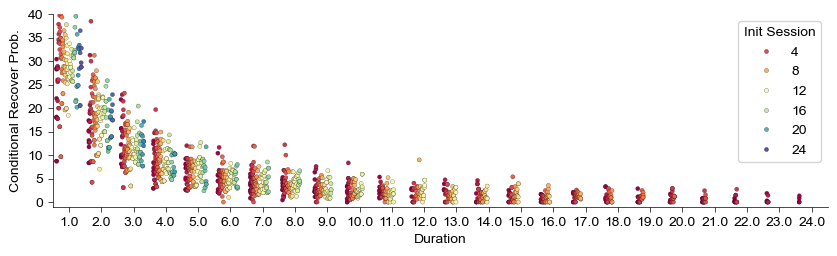

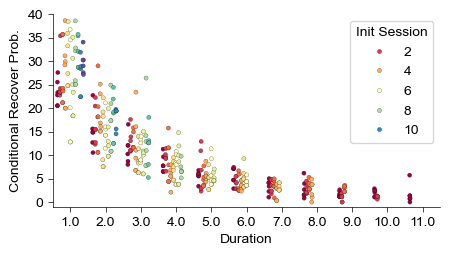

Maze A - Conditional Recover Prob.:
  1 -   F-value: 1.5485, p-value: 0.13111964864877218, len: 12
  2 -   F-value: 1.2903, p-value: 0.24676159419275676, len: 12
  3 -   F-value: 0.8338, p-value: 0.6072403201684643, len: 12
  4 -   F-value: 0.8825, p-value: 0.5613406869310021, len: 12
  5 -   F-value: 0.9531, p-value: 0.4974389108693529, len: 12
  6 -   F-value: 0.5292, p-value: 0.875745368571163, len: 12
  7 -   F-value: 0.4392, p-value: 0.9311778091669753, len: 12
  8 -   F-value: 0.8626, p-value: 0.5809665587134405, len: 12
  9 -   F-value: 1.4932, p-value: 0.16605902136804887, len: 12
  10 -   F-value: 2.1045, p-value: 0.0408217387539972, len: 12
  11 -   F-value: 1.6918, p-value: 0.11179047480264831, len: 12

Maze B - Conditional Recover Prob.:
  1 -   F-value: 1.2483, p-value: 0.28236470181513385, len: 11
  2 -   F-value: 0.8786, p-value: 0.5503768289565942, len: 10
  3 -   F-value: 0.7210, p-value: 0.6719837464842187, len: 9
  4 -   F-value: 1.2208, p-value: 0.31424098605212125,

In [19]:
fig = plt.figure(figsize=(4,2))
idx = np.where((Data['Paradigm'] == 'CrossMaze')&
               (np.isnan(Data['Conditional Recover Prob.']) == False)&
               (Data['Maze Type'] != 'Open Field')&
               (Data['Type'] == 'Real'))[0]

SubData = SubDict(Data, Data.keys(), idx=idx)
idx1 = np.where(SubData['Maze Type'] == 'Maze 1')[0]
idx2 = np.where(SubData['Maze Type'] == 'Maze 2')[0]


fig = plt.figure(figsize=(10, 2.5))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx1),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))

plt.savefig(join(loc, 'Conditional recover prob [Maze 1].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [Maze 1].svg'), dpi = 600)
plt.show()

fig = plt.figure(figsize=(5, 2.5))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubDict(SubData, SubData.keys(), idx=idx2),
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))

plt.savefig(join(loc, 'Conditional recover prob [Maze 2].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [Maze 2].svg'), dpi = 600)
plt.show()

# Statistical Test
print("Maze A - Conditional Recover Prob.:")
for dur in range(1, 12):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx1), duration = dur, init_session_max=12, key = 'Conditional Recover Prob.'))
print()
print("Maze B - Conditional Recover Prob.:")
for dur in range(1, 11):
    print(f"  {dur} - "+one_way_anova(SubDict(SubData, SubData.keys(), idx=idx2), duration = dur, init_session_max=12, key = 'Conditional Recover Prob.'))
print()

# MAf, MAb, HPf, HPb (Fig. S11 remaining不需要改)

In [ ]:
# MAf ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze cis') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [MAf].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [MAf].svg'), dpi = 600)
plt.close()

print("MAf - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze cis') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [MAf].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [MAf].svg'), dpi = 600)
plt.close()
print("MAf - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()

# MAb ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze trs') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [MAb].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [MAb].svg'), dpi = 600)
plt.close()

print("MAb - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'ReverseMaze trs') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [MAb].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [MAb].svg'), dpi = 600)
plt.close()
print("MAb - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()


# HPf ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze cis') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [HPf].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [HPf].svg'), dpi = 600)
plt.close()

print("HPf - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze cis') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [HPf].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [HPf].svg'), dpi = 600)
plt.close()
print("HPf - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()

# HPb ----------------------------------------------------------------------------
idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze trs') &
    (np.isnan(Data['Conditional Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=2,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))

plt.savefig(join(loc, 'conditional prob [HPb].png'), dpi = 600)
plt.savefig(join(loc, 'conditional prob [HPb].svg'), dpi = 600)
plt.close()

print("HPb - Conditional Prob.:")
for dur in range(1, 6):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=6, key = 'Conditional Prob.'))
print()

idx = np.where(
    (Data['Paradigm'] == 'HairpinMaze trs') &
    (np.isnan(Data['Conditional Recover Prob.']) == False)&
    (Data['Type'] == 'Real')
)[0]
SubData = SubDict(Data, Data.keys(), idx=idx)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData,
    hue = "Init Session",
    palette = 'Spectral',
    edgecolor='black',
    size=3,
    linewidth=0.15,
    ax = ax,
    dodge=True,
    jitter=0.1
)
ax.set_ylim(-1, 40)
ax.set_yticks(np.linspace(0, 40, 9))
plt.savefig(join(loc, 'Conditional recover prob [HPb].png'), dpi = 600)
plt.savefig(join(loc, 'Conditional recover prob [HPb].svg'), dpi = 600)
plt.close()
print("HPb - Conditional Recover Prob.:")
for dur in range(1, 5):
    print(f"  {dur} - "+one_way_anova(SubData, duration = dur, init_session_max=5, key = 'Conditional Recover Prob.'))
print()